## This notebook will construct the nodes and edges that we will build our graph with

Import relevant libraries and import raw data

In [5]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")

In [39]:
def normalise(absorbances):
    max_value = np.max(absorbances)
    normalized_absorbances = absorbances / max_value
    return normalized_absorbances

df['Absorbance'] = df.groupby('SpecID')['Absorbance'].transform(lambda x: normalise(x))

<AxesSubplot: xlabel='WaveNumber', ylabel='Absorbance'>

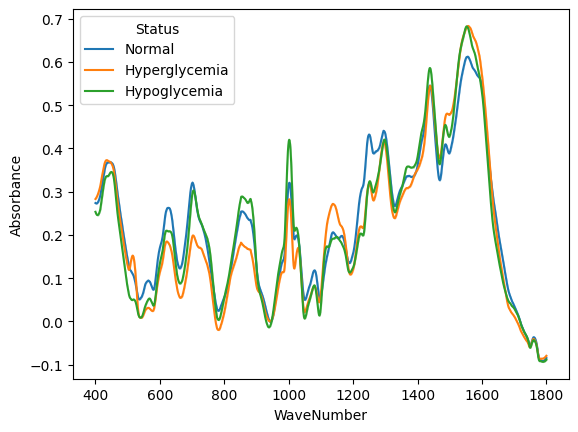

In [8]:
sns.lineplot(data=df, x='WaveNumber', y='Absorbance', hue='Status', errorbar=('ci', False))

Here we use scipy's function "find_peaks" to find all peaks in each individual spectra sample as well as pulling featurse such as prominence and width of peaks

In [42]:
df

,WaveNumber,Status,SurID,Absorbance
0,400.22778,Hyperglycemia,210120-1,0.288292
1,400.22778,Hyperglycemia,210120-2,0.283668
2,400.22778,Hyperglycemia,210121-1,0.233526
3,400.22778,Hyperglycemia,210121-2,0.262955
4,400.22778,Hyperglycemia,210211-1,0.196753
...,...,...,...,...
129082,1799.77220,Normal,210421-1,-0.160775
129083,1799.77220,Normal,210428-1,-0.219247
129084,1799.77220,Normal,210428-2,-0.258882
129085,1799.77220,Normal,210428-3,-0.163821


In [41]:
df = df.groupby(["WaveNumber", "Status", "SurID"])["Absorbance"].median().reset_index()

In [30]:
pivoted_df = df.pivot(index='SurID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None
statuses = df[['SurID', 'Status']].drop_duplicates()
pivoted_df = pd.merge(pivoted_df, statuses, on='SurID')
pivoted_df = pivoted_df.set_index('SurID')

In [31]:
pivoted_df

,400.22778,400.91116,401.59454,402.27789,402.96127,403.64465,404.32803,405.01138,405.69476,406.37814,...,1794.3053,1794.9886,1795.672,1796.3553,1797.0387,1797.722,1798.4055,1799.0889,1799.7722,Status
SurID,,,,,,,,,,,,,,,,,,,,,
201210-1,-0.058689,-0.066991,-0.074928,-0.082501,-0.089709,-0.096553,-0.103032,-0.109147,-0.114897,-0.120283,...,0.032843,0.031218,0.027258,0.023062,0.018629,0.013959,0.009052,0.003909,-0.001471,Normal
201210-2,0.007729,0.002413,-0.001217,-0.002609,-0.002185,-0.003564,-0.009344,-0.008238,-0.010361,-0.010655,...,-0.184560,-0.183300,-0.181898,-0.180022,-0.177437,-0.176293,-0.173221,-0.170003,-0.169641,Normal
210114-1,0.387279,0.393415,0.398930,0.397568,0.397699,0.400255,0.398940,0.397563,0.397306,0.394620,...,-0.194537,-0.193099,-0.188871,-0.185867,-0.184492,-0.182974,-0.180242,-0.176794,-0.172411,Normal
210114-2,0.255064,0.266620,0.277900,0.286449,0.294616,0.297832,0.300375,0.304052,0.308899,0.310924,...,-0.114605,-0.113364,-0.112946,-0.112420,-0.111784,-0.111956,-0.109548,-0.106261,-0.106235,Normal
210120-1,0.288292,0.289058,0.283517,0.281542,0.282742,0.275469,0.265132,0.255318,0.246028,0.237438,...,-0.061323,-0.059542,-0.056989,-0.054686,-0.053420,-0.054195,-0.055019,-0.053642,-0.053484,Hyperglycemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210519-3,0.261917,0.265817,0.275897,0.278023,0.280026,0.283618,0.288373,0.292924,0.296343,0.299475,...,-0.138533,-0.136116,-0.136396,-0.137041,-0.133385,-0.133307,-0.135453,-0.137581,-0.137387,Hyperglycemia
210524-1,-0.018318,-0.015001,-0.012765,-0.015358,-0.016529,-0.019422,-0.022096,-0.024551,-0.026788,-0.028422,...,-0.202377,-0.199518,-0.196421,-0.193086,-0.189513,-0.191280,-0.193641,-0.192822,-0.190013,Hypoglycemia
210526-1,-0.115204,-0.123071,-0.125662,-0.132850,-0.137412,-0.138584,-0.136589,-0.141243,-0.141089,-0.144197,...,-0.161344,-0.162009,-0.162742,-0.159979,-0.158991,-0.156918,-0.152557,-0.151526,-0.149992,Hyperglycemia


In [74]:
status_df = pivoted_df['Status']

In [77]:
status_df = status_df.reset_index()

In [79]:
status_df.to_csv('../../data/graph_2_6/status.csv')

In [32]:
from pycaret.classification import *

In [33]:
caret = setup(data=pivoted_df, target='Status', session_id=1234)

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(63, 2050)"
5,Transformed data shape,"(63, 2050)"
6,Transformed train set shape,"(44, 2050)"
7,Transformed test set shape,"(19, 2050)"
8,Numeric features,2049
9,Preprocess,True


In [34]:
compare_models(exclude=['lightgbm', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6450,0.8017,0.6450,0.6775,0.6177,0.4698,0.5240,0.0370
xgboost,Extreme Gradient Boosting,0.6400,0.8742,0.6400,0.6225,0.6003,0.4513,0.5046,0.4760
et,Extra Trees Classifier,0.6250,0.7958,0.6250,0.5483,0.5562,0.4624,0.5261,0.0850
svm,SVM - Linear Kernel,0.6150,0.0000,0.6150,0.6115,0.5712,0.4617,0.5124,0.0370
ridge,Ridge Classifier,0.6100,0.0000,0.6100,0.6000,0.5608,0.4357,0.5157,0.0320
lr,Logistic Regression,0.5950,0.8008,0.5950,0.5358,0.5278,0.4184,0.5019,0.3710
nb,Naive Bayes,0.5250,0.7571,0.5250,0.4592,0.4573,0.3138,0.3704,0.0350
rf,Random Forest Classifier,0.5150,0.8158,0.5150,0.4543,0.4590,0.2649,0.2949,0.0940
qda,Quadratic Discriminant Analysis,0.4750,0.6000,0.4750,0.4596,0.4363,0.2050,0.2254,0.0360
knn,K Neighbors Classifier,0.4700,0.5883,0.4700,0.3779,0.3920,0.2311,0.2788,0.0410


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [43]:
peaks = []
widths = []
prom = []

for _, group in df.groupby('SurID'):
    peak_index, weights = find_peaks(x=group['Absorbance'], distance=10, width=10)
    peaks += list(group.iloc[peak_index].index.values)
    widths += list(weights['widths'])
    prom += list(weights['prominences'])

In [44]:
weights['widths']

array([ 89.69796135,  21.02022454,  15.63748991,  11.51573362,
        10.3974725 ,  47.83444497,  95.90962193, 102.94094506,
        50.08310562,  16.2250828 ,  76.98159764,  23.7075836 ,
        47.54346318,  32.07622249,  11.99539652,  78.49747364,
        16.48157671, 207.62051131,  10.76839069])

In [45]:
print(len(peaks))

1142


Below shows a scatterplot of the coordinates of all the peaks we have found

<AxesSubplot: xlabel='WaveNumber', ylabel='Absorbance'>

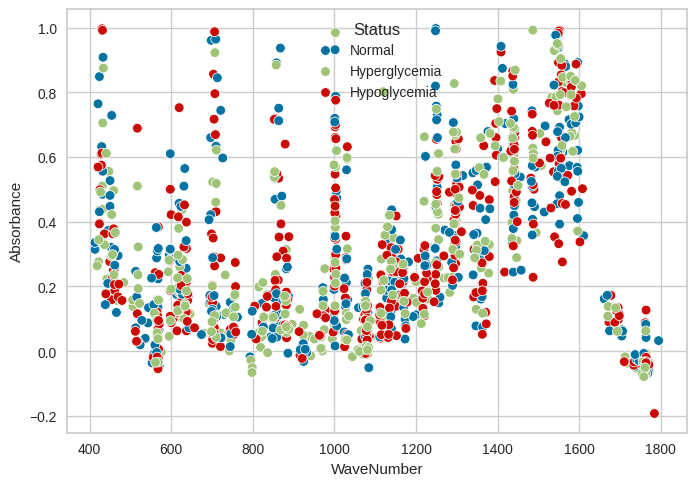

In [46]:
sns.scatterplot(data=df.iloc[peaks].reset_index(), x="WaveNumber", y="Absorbance", hue="Status")

We then add the peak information to our main dataframe

In [47]:
peak_df = df.iloc[peaks]
peak_df['Widths'] = widths
peak_df['Prominences'] = prom

In [48]:
peak_df

,WaveNumber,Status,SurID,Absorbance,Widths,Prominences
6467,469.93167,Normal,201210-1,0.295378,73.973526,0.242838
15476,567.65375,Normal,201210-1,0.223674,14.026237,0.030748
20264,619.58997,Normal,201210-1,0.457190,69.527171,0.330873
27509,698.17767,Normal,201210-1,0.960494,67.260943,0.985178
41936,854.66968,Normal,201210-1,0.469561,14.423201,0.015300
...,...,...,...,...,...,...
93510,1414.35080,Hyperglycemia,210526-3,0.598462,11.995397,0.028293
95589,1436.90210,Hyperglycemia,210526-3,0.658121,78.497474,0.285615
100188,1486.78820,Hyperglycemia,210526-3,0.596577,16.481577,0.117718
106425,1554.44190,Hyperglycemia,210526-3,0.904158,207.620511,0.982393


In [49]:
peaks = [[407, 495], [453,454], [516,537], 519, [603,738], [620, 624], [821, 839], [866, 887], 972, [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], 1170, [1188, 1196], [1212-1294], [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], 1668]

In [51]:
# Peaks list, corrected format
peaks_corrected = [[407, 495], [453, 454], [516, 537], [519, 519], [603, 738], [620, 624], [821, 839], [866, 887], [972, 972], 
         [1000, 1003], [1030, 1036], [1060, 1078], [1132, 1152], [1170, 1170], [1188, 1196], [1212, 1294], 
         [1427, 1446], [1448, 1450], [1520, 1533], [1542, 1594], [1611, 1653], [1668, 1668]]

# Convert peaks to a more efficient structure for processing
peak_ranges = [(peak[0], peak[1]) for peak in peaks_corrected]

# Create a function to determine the peak range for each WaveNumber
def find_peak_range(wavenumber):
    for start, end in peak_ranges:
        if start <= wavenumber <= end:
            return f"{start}-{end}"
    return None

# Apply the function to create a new column for peak range
peak_df['PeakRange'] = peak_df['WaveNumber'].apply(find_peak_range)

# Now, group by both SpecID and the new PeakRange column, and compute max Absorbance for each group
grouped = peak_df.groupby(['SurID', 'PeakRange'])['Absorbance'].max().reset_index()

# Pivot the table to have SpecID as rows and PeakRange as columns, filled with max Absorbance values
efficient_pivot_df = grouped.pivot(index='SurID', columns='PeakRange', values='Absorbance').reset_index()

# Fill NaN values with an appropriate placeholder if needed (e.g., 0 or empty string), here we keep NaNs
efficient_pivot_df

PeakRange,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887
0,201210-1,NaN,NaN,NaN,0.087231,NaN,0.279230,0.333848,NaN,NaN,0.392664,0.295378,NaN,0.960494,NaN,0.479237
1,201210-2,NaN,NaN,NaN,0.183158,NaN,0.507239,0.635203,NaN,NaN,0.887520,0.229211,NaN,0.633354,NaN,NaN
2,210114-1,NaN,NaN,NaN,0.343212,NaN,0.819568,0.554622,NaN,NaN,0.715258,0.372932,NaN,0.267060,NaN,0.047185
3,210114-2,NaN,NaN,NaN,NaN,NaN,0.532867,0.454209,NaN,NaN,0.615240,0.314748,NaN,0.175106,NaN,-0.006132
4,210120-1,NaN,NaN,0.063625,0.110998,NaN,0.321952,NaN,NaN,NaN,0.666833,0.223109,NaN,0.119592,0.045332,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.402753,0.108629,NaN,NaN,NaN,0.114548,0.557734,NaN,NaN,0.849738,0.344593,NaN,0.297029,NaN,0.074993
59,210524-1,0.504524,NaN,NaN,0.417898,NaN,0.542800,0.741770,NaN,NaN,0.883116,0.207230,0.689040,0.349613,NaN,NaN
60,210526-1,NaN,NaN,NaN,0.253525,NaN,0.555995,NaN,NaN,NaN,0.945225,0.236481,0.193717,0.621405,NaN,NaN
61,210526-2,0.984194,NaN,NaN,0.420138,NaN,0.677248,NaN,NaN,NaN,0.950521,0.422359,0.322463,0.922367,NaN,NaN


In [53]:
# Replace all NaN values with 0
efficient_pivot_df_filled = efficient_pivot_df.fillna(0)

efficient_pivot_df_filled

PeakRange,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887
0,201210-1,0.000000,0.000000,0.000000,0.087231,0.0,0.279230,0.333848,0.0,0.0,0.392664,0.295378,0.000000,0.960494,0.000000,0.479237
1,201210-2,0.000000,0.000000,0.000000,0.183158,0.0,0.507239,0.635203,0.0,0.0,0.887520,0.229211,0.000000,0.633354,0.000000,0.000000
2,210114-1,0.000000,0.000000,0.000000,0.343212,0.0,0.819568,0.554622,0.0,0.0,0.715258,0.372932,0.000000,0.267060,0.000000,0.047185
3,210114-2,0.000000,0.000000,0.000000,0.000000,0.0,0.532867,0.454209,0.0,0.0,0.615240,0.314748,0.000000,0.175106,0.000000,-0.006132
4,210120-1,0.000000,0.000000,0.063625,0.110998,0.0,0.321952,0.000000,0.0,0.0,0.666833,0.223109,0.000000,0.119592,0.045332,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.402753,0.108629,0.000000,0.000000,0.0,0.114548,0.557734,0.0,0.0,0.849738,0.344593,0.000000,0.297029,0.000000,0.074993
59,210524-1,0.504524,0.000000,0.000000,0.417898,0.0,0.542800,0.741770,0.0,0.0,0.883116,0.207230,0.689040,0.349613,0.000000,0.000000
60,210526-1,0.000000,0.000000,0.000000,0.253525,0.0,0.555995,0.000000,0.0,0.0,0.945225,0.236481,0.193717,0.621405,0.000000,0.000000
61,210526-2,0.984194,0.000000,0.000000,0.420138,0.0,0.677248,0.000000,0.0,0.0,0.950521,0.422359,0.322463,0.922367,0.000000,0.000000


In [55]:
# Add back "Status" and "SurID" columns by joining on "SpecID"
# First, create a DataFrame with unique SpecID, Status, and SurID
status_surid_df = peak_df[['Status', 'SurID']].drop_duplicates()

# Merge this back into the efficient pivot table
pivot_df_with_status_surid = efficient_pivot_df_filled.merge(status_surid_df, on='SurID', how='left')

pivot_df_with_status_surid

,SurID,1000-1003,1030-1036,1060-1078,1132-1152,1188-1196,1212-1294,1427-1446,1448-1450,1520-1533,1542-1594,407-495,516-537,603-738,821-839,866-887,Status
0,201210-1,0.000000,0.000000,0.000000,0.087231,0.0,0.279230,0.333848,0.0,0.0,0.392664,0.295378,0.000000,0.960494,0.000000,0.479237,Normal
1,201210-2,0.000000,0.000000,0.000000,0.183158,0.0,0.507239,0.635203,0.0,0.0,0.887520,0.229211,0.000000,0.633354,0.000000,0.000000,Normal
2,210114-1,0.000000,0.000000,0.000000,0.343212,0.0,0.819568,0.554622,0.0,0.0,0.715258,0.372932,0.000000,0.267060,0.000000,0.047185,Normal
3,210114-2,0.000000,0.000000,0.000000,0.000000,0.0,0.532867,0.454209,0.0,0.0,0.615240,0.314748,0.000000,0.175106,0.000000,-0.006132,Normal
4,210120-1,0.000000,0.000000,0.063625,0.110998,0.0,0.321952,0.000000,0.0,0.0,0.666833,0.223109,0.000000,0.119592,0.045332,0.000000,Hyperglycemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,210519-3,0.402753,0.108629,0.000000,0.000000,0.0,0.114548,0.557734,0.0,0.0,0.849738,0.344593,0.000000,0.297029,0.000000,0.074993,Hyperglycemia
59,210524-1,0.504524,0.000000,0.000000,0.417898,0.0,0.542800,0.741770,0.0,0.0,0.883116,0.207230,0.689040,0.349613,0.000000,0.000000,Hypoglycemia
60,210526-1,0.000000,0.000000,0.000000,0.253525,0.0,0.555995,0.000000,0.0,0.0,0.945225,0.236481,0.193717,0.621405,0.000000,0.000000,Hyperglycemia
61,210526-2,0.984194,0.000000,0.000000,0.420138,0.0,0.677248,0.000000,0.0,0.0,0.950521,0.422359,0.322463,0.922367,0.000000,0.000000,Hyperglycemia


In [59]:
caret = setup(data=pivot_df_with_status_surid, target='Status', session_id=1234)

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(63, 17)"
5,Transformed data shape,"(63, 17)"
6,Transformed train set shape,"(44, 17)"
7,Transformed test set shape,"(19, 17)"
8,Numeric features,15
9,Categorical features,1


In [60]:
compare_models(exclude=['lightgbm', 'gbc'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4850,0.6725,0.4850,0.4808,0.4425,0.2462,0.2679,0.3190
ridge,Ridge Classifier,0.4600,0.0000,0.4600,0.4258,0.4147,0.1971,0.2030,0.0200
svm,SVM - Linear Kernel,0.4500,0.0000,0.4500,0.3650,0.3953,0.1862,0.2017,0.0230
knn,K Neighbors Classifier,0.4450,0.5533,0.4450,0.4225,0.4000,0.1787,0.1918,0.0240
rf,Random Forest Classifier,0.4150,0.6221,0.4150,0.2019,0.2629,0.0444,0.0577,0.0760
qda,Quadratic Discriminant Analysis,0.4100,0.4917,0.4100,0.1826,0.2511,-0.0091,-0.0129,0.0220
nb,Naive Bayes,0.3750,0.5000,0.3750,0.1592,0.2195,0.0000,0.0000,0.0210
dt,Decision Tree Classifier,0.3750,0.5000,0.3750,0.1592,0.2195,0.0000,0.0000,0.0220
ada,Ada Boost Classifier,0.3750,0.5000,0.3750,0.1592,0.2195,0.0000,0.0000,0.0390
lda,Linear Discriminant Analysis,0.3750,0.5000,0.3750,0.1592,0.2195,0.0000,0.0000,0.0200


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
node_df

,Status:LABEL,SurID:ID
0,Normal,201210-1
1,Normal,201210-2
2,Normal,210114-1
3,Normal,210114-2
4,Hyperglycemia,210120-1
...,...,...
58,Hyperglycemia,210519-3
59,Hypoglycemia,210524-1
60,Hyperglycemia,210526-1
61,Hyperglycemia,210526-2


In [56]:
node_df = pivot_df_with_status_surid[['Status', 'SurID']]
node_df.rename(columns={'SurID':'SurID:ID', 'Status':'Status:LABEL'}, inplace=True)

In [61]:
node_df.to_csv('../../data/graph_2_6/nodes.csv')

In [63]:
features_df = pivot_df_with_status_surid.drop(['SurID', 'Status', 'SurID'], axis=1)

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(features_df)

# If you want to convert it to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=pivot_df_with_status_surid['SurID'], columns=pivot_df_with_status_surid['SurID'])

In [66]:
cosine_sim_df

SurID,201210-1,201210-2,210114-1,210114-2,210120-1,210120-2,210121-1,210121-2,210211-1,210211-2,...,210510-2,210511-1,210518-1,210519-1,210519-2,210519-3,210524-1,210526-1,210526-2,210526-3
SurID,,,,,,,,,,,,,,,,,,,,,
201210-1,1.000000,0.794544,0.654535,0.634952,0.541261,0.781356,0.542966,0.576122,0.292017,0.562604,...,0.500249,0.581436,0.584890,0.644192,0.661377,0.645731,0.569763,0.729101,0.668913,0.808393
201210-2,0.794544,1.000000,0.916212,0.926358,0.816587,0.902753,0.889299,0.795807,0.367462,0.893628,...,0.688787,0.580003,0.636558,0.845548,0.835686,0.860843,0.821428,0.878443,0.732728,0.916513
210114-1,0.654535,0.916212,1.000000,0.958453,0.834103,0.840255,0.834000,0.794904,0.437851,0.880261,...,0.725525,0.653433,0.699105,0.942623,0.741884,0.756675,0.813529,0.825861,0.692422,0.855418
210114-2,0.634952,0.926358,0.958453,1.000000,0.847947,0.887611,0.821227,0.754507,0.350160,0.885001,...,0.717393,0.672185,0.635326,0.926391,0.821099,0.833656,0.790151,0.803485,0.650441,0.894238
210120-1,0.541261,0.816587,0.834103,0.847947,1.000000,0.724922,0.839946,0.937878,0.214533,0.859693,...,0.855033,0.367108,0.359231,0.705503,0.728506,0.753023,0.688924,0.918931,0.727891,0.772032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210519-3,0.645731,0.860843,0.756675,0.833656,0.753023,0.952892,0.848704,0.765037,0.258417,0.865197,...,0.705033,0.618972,0.566839,0.794215,0.963714,1.000000,0.816808,0.716195,0.744853,0.859341
210524-1,0.569763,0.821428,0.813529,0.790151,0.688924,0.828205,0.825369,0.716331,0.367363,0.806993,...,0.630286,0.552800,0.811928,0.836079,0.771786,0.816808,1.000000,0.757120,0.801936,0.823106
210526-1,0.729101,0.878443,0.825861,0.803485,0.918931,0.733790,0.806441,0.901112,0.245877,0.782380,...,0.778125,0.360314,0.516530,0.688323,0.690317,0.716195,0.757120,1.000000,0.839599,0.804317


In [68]:
kernel_df = cosine_sim_df

In [69]:
relationship_df = kernel_df.reset_index()
relationship_df = relationship_df.melt(id_vars='SurID', var_name=':END_ID', value_name='Weight:float')
relationship_df = relationship_df.rename(columns={'SurID': ':START_ID'})
relationship_df[':TYPE'] = 'LINK'

In [70]:
relationship_df = relationship_df[relationship_df[":START_ID"] != relationship_df[":END_ID"]]
relationship_df = relationship_df[relationship_df[":START_ID"] < relationship_df[":END_ID"]]

In [71]:
relationship_df

,:START_ID,:END_ID,Weight:float,:TYPE
63,201210-1,201210-2,0.794544,LINK
126,201210-1,210114-1,0.654535,LINK
127,201210-2,210114-1,0.916212,LINK
189,201210-1,210114-2,0.634952,LINK
190,201210-2,210114-2,0.926358,LINK
...,...,...,...,...
3963,210519-2,210526-3,0.818088,LINK
3964,210519-3,210526-3,0.859341,LINK
3965,210524-1,210526-3,0.823106,LINK
3966,210526-1,210526-3,0.804317,LINK


In [72]:
relationship_df.to_csv('../../data/graph_2_6/relationships.csv')